# Patient Durg Assigning Task.

## 3 models are made to increase the accuracy in successding one.

In [17]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\roari\Downloads\drug.csv"
data = pd.read_csv(file_path)


In [19]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [21]:
data.shape

(200, 6)

In [23]:
data.size

1200

In [25]:
data.columns.tolist()

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug_Type']

In [27]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug_Type       object
dtype: object

In [29]:
# Count of null values in each column
null_count = data.isnull().sum()
print(null_count)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64


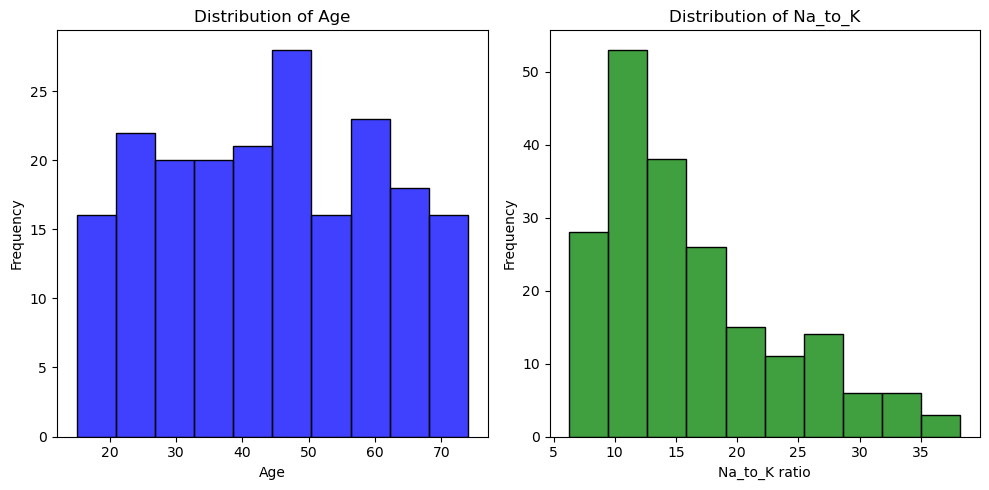

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'Age'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=10, kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot histogram for 'Na_to_K'
plt.subplot(1, 2, 2)
sns.histplot(data['Na_to_K'], bins=10, kde=False, color='green')
plt.title('Distribution of Na_to_K')
plt.xlabel('Na_to_K ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


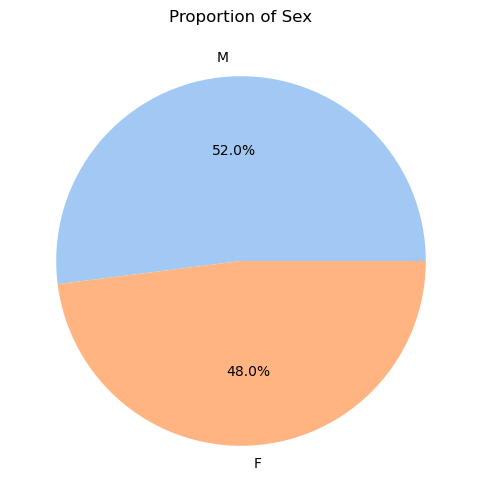

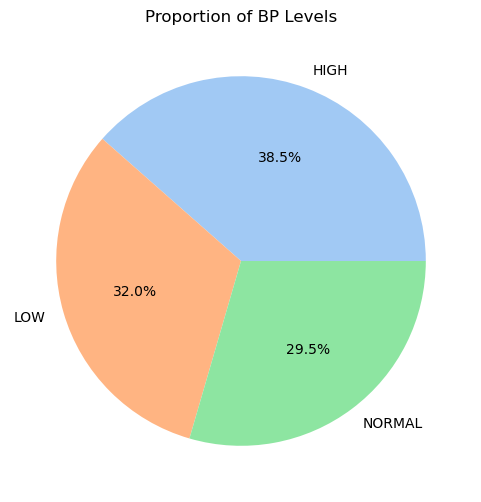

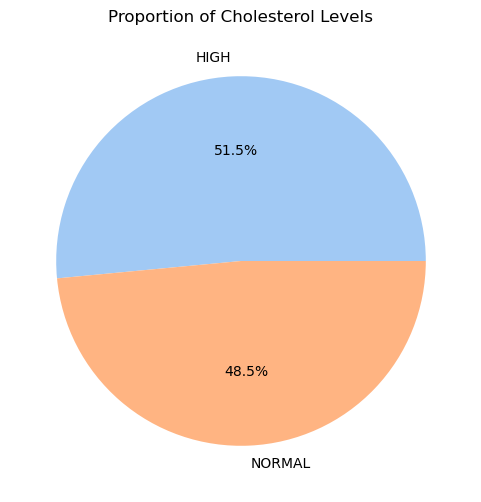

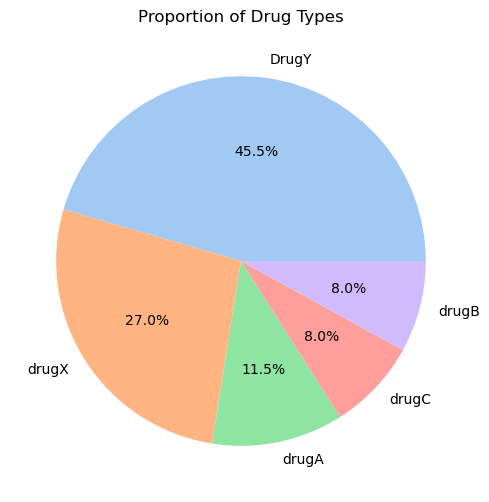

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot pie chart
def plot_pie(column, title):
    plt.figure(figsize=(6, 6))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(title)
    plt.ylabel('')  # Hide the y-label for better visualization
    plt.show()

# Plot pie charts for categorical columns
plot_pie('Sex', 'Proportion of Sex')
plot_pie('BP', 'Proportion of BP Levels')
plot_pie('Cholesterol', 'Proportion of Cholesterol Levels')
plot_pie('Drug_Type', 'Proportion of Drug Types')


In [37]:
import pandas as pd

# Assuming 'data' is your DataFrame loaded from the CSV
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol', 'Drug_Type'], drop_first=True)

# Display the first few rows of the encoded DataFrame
data_encoded.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Type_drugA,Drug_Type_drugB,Drug_Type_drugC,Drug_Type_drugX
0,23,25.355,False,False,False,False,False,False,False,False
1,47,13.093,True,True,False,False,False,False,True,False
2,47,10.114,True,True,False,False,False,False,True,False
3,28,7.798,False,False,True,False,False,False,False,True
4,61,18.043,False,True,False,False,False,False,False,False


In [41]:
# Convert True/False to 1/0
data_encoded = data_encoded.astype(int)

# Display the first few rows of the updated DataFrame
data_encoded.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Type_drugA,Drug_Type_drugB,Drug_Type_drugC,Drug_Type_drugX
0,23,25,0,0,0,0,0,0,0,0
1,47,13,1,1,0,0,0,0,1,0
2,47,10,1,1,0,0,0,0,1,0
3,28,7,0,0,1,0,0,0,0,1
4,61,18,0,1,0,0,0,0,0,0


In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
data_encoded[['Age', 'Na_to_K']] = scaler.fit_transform(data_encoded[['Age', 'Na_to_K']])

# Display the first few rows of the standardized DataFrame
data_encoded.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Type_drugA,Drug_Type_drugB,Drug_Type_drugC,Drug_Type_drugX
0,-1.291591,1.311022,0,0,0,0,0,0,0,0
1,0.162699,-0.359957,1,1,0,0,0,0,1,0
2,0.162699,-0.777701,1,1,0,0,0,0,1,0
3,-0.988614,-1.195446,0,0,1,0,0,0,0,1
4,1.011034,0.336285,0,1,0,0,0,0,0,0


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Precision: 0.9
Recall: 0.8181818181818182
F1 Score: 0.8571428571428571
Support: 11.0


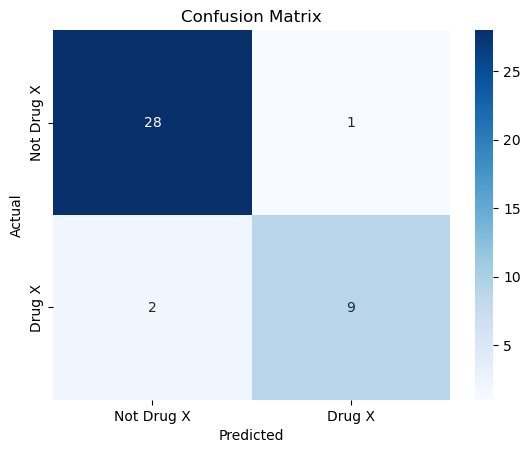

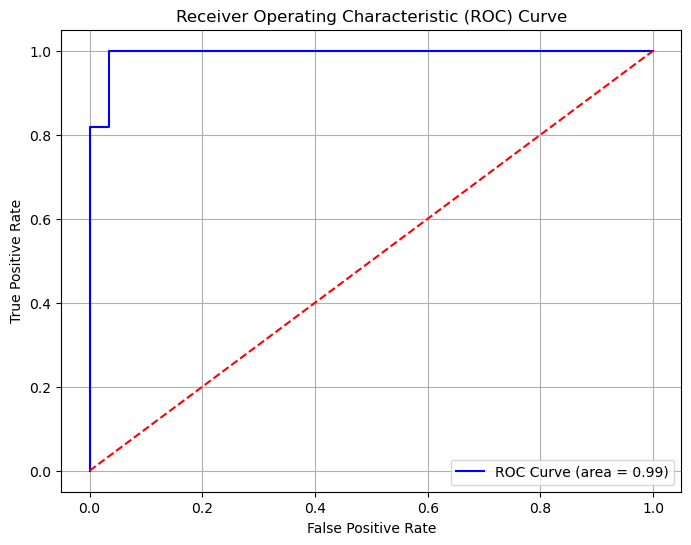

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_encoded' is your one-hot encoded and standardized DataFrame

# Prepare features (X) and target variable (y)
X = data_encoded.drop('Drug_Type_drugX', axis=1)  # Assuming 'Drug_Type_drugX' is the target
y = data_encoded['Drug_Type_drugX']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Fit the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Precision:", report['1']['precision'])
print("Recall:", report['1']['recall'])
print("F1 Score:", report['1']['f1-score'])
print("Support:", report['1']['support'])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Drug X', 'Drug X'], yticklabels=['Not Drug X', 'Drug X'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

Drug_Type_drugA       1.00      1.00      1.00        21
Drug_Type_drugB       1.00      1.00      1.00         3
Drug_Type_drugC       1.00      1.00      1.00         5
Drug_Type_drugX       1.00      1.00      1.00        11

       accuracy                           1.00        40
      macro avg       1.00      1.00      1.00        40
   weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[21  0  0  0]
 [ 0  3  0  0]
 [ 0  0  5  0]
 [ 0  0  0 11]]


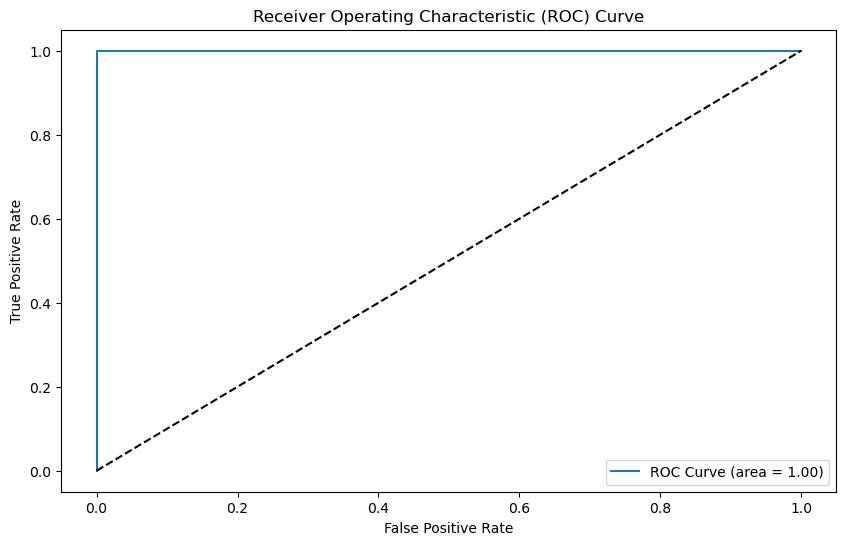

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame after one-hot encoding and standardization

# Split the data into features and target variable
X = data_encoded.drop(columns=['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX'])
y = data_encoded[['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX']].idxmax(axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate the model
train_accuracy = best_knn.score(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Predictions and evaluation metrics
y_pred = best_knn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve
y_scores = best_knn.predict_proba(X_test)  # Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1], pos_label='Drug_Type_drugB')  # Example for one class

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Cross-Validation Scores: [0.9   0.925 1.    0.9   0.975]
Mean Cross-Validation Score: 0.94

Classification Report:
                 precision    recall  f1-score   support

Drug_Type_drugA       1.00      1.00      1.00        21
Drug_Type_drugB       1.00      1.00      1.00         3
Drug_Type_drugC       1.00      1.00      1.00         5
Drug_Type_drugX       1.00      1.00      1.00        11

       accuracy                           1.00        40
      macro avg       1.00      1.00      1.00        40
   weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[21  0  0  0]
 [ 0  3  0  0]
 [ 0  0  5  0]
 [ 0  0  0 11]]


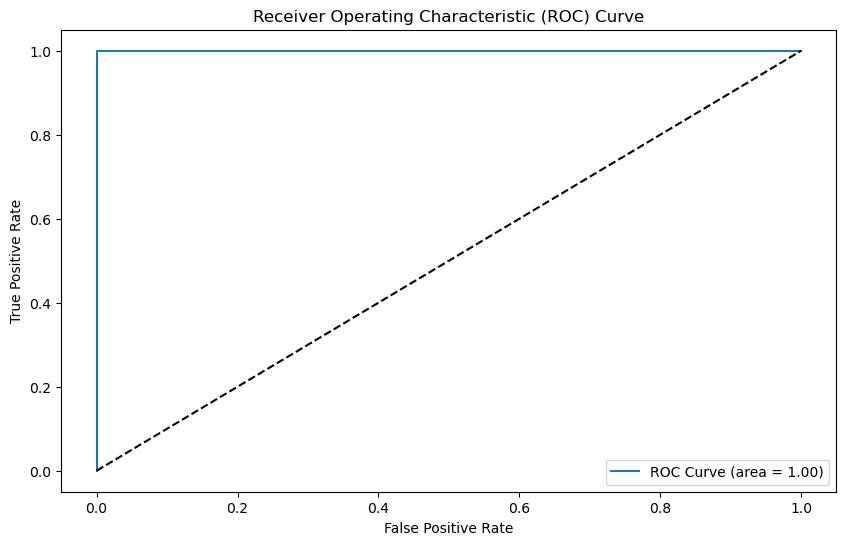

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame after one-hot encoding and standardization

# Split the data into features and target variable
X = data_encoded.drop(columns=['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX'])
y = data_encoded[['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX']].idxmax(axis=1)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(best_knn, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

# Fit the model on the entire dataset
best_knn.fit(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test)

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Drug_Type_drugA', 'Drug_Type_drugB', 'Drug_Type_drugC', 'Drug_Type_drugX']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve
y_scores = best_knn.predict_proba(X_test)  # Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1], pos_label='Drug_Type_drugB')  # Example for one class

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
